# House Prices - Advanced Regression Techniques (Simple Modeling)

Regression을 공부하기 좋은 데이터셋인 House Price를 분석해보았다. 

Donwload Link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

<b> Data fields

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: dollar Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Loading Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
train = pd.read_csv('house_train.csv')
train_org = train.copy()
test = pd.read_csv('house_test.csv')
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (1460, 81)
test shape:  (1459, 80)


In [4]:
test['SalePrice'] = None

full = pd.concat([train, test], ignore_index=True)
full_org = full.copy()
full.drop(['Id', 'SalePrice'], axis = 1, inplace = True)
full.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


train, test를 합쳐주었다.

## Glimpse the Datasets

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [6]:
print('Count of Types:\n' ,full.dtypes.value_counts())

null_count = full.isnull().sum()
sorted_null_count = null_count[null_count > 0].sort_values(ascending = False)
print()
print('NaN value: \n', sorted_null_count)

Count of Types:
 object     43
int64      25
float64    11
dtype: int64

NaN value: 
 PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


PoolQC, MiscFeature, Alley, Fence, FireplaceQu의 Missing value가 상당히 많다.

## Feature Engeneering

### target feature Transformation

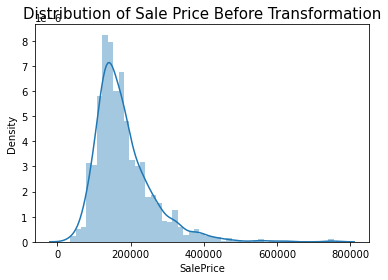

In [7]:
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price Before Transformation', size = 15)
plt.show()

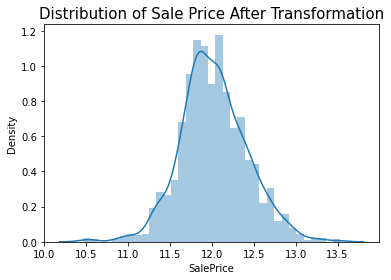

In [8]:
sns.distplot(np.log1p(train['SalePrice']))
plt.title('Distribution of Sale Price After Transformation', size = 15)
plt.show()

log 변환을 통해 Sale Price는 정규분포에 근사하게 되었다.

In [9]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [10]:
full.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence',  'FireplaceQu'], axis =1, inplace = True)
full.fillna(full.mean(), inplace = True)
print('There Is NaN? :' ,full.isnull().sum().sum())

There Is NaN? : 1075


### One Hot Encoding

In [11]:
print('Before One Hot Encoding: ', full.shape)
full_ohe = pd.get_dummies(full)
print('After One Hot Encoding', full_ohe.shape)

Before One Hot Encoding:  (2919, 74)
After One Hot Encoding (2919, 270)


In [12]:
print('There Is NaN :', full_ohe.isnull().sum().sum())

There Is NaN : 0


### Preprocessing Skew

In [13]:
from scipy.stats import skew

num_features = full.dtypes[full.dtypes != 'object'].index
full_skew = full[num_features].apply(lambda x : skew(x))
skewed_high = full_skew[full_skew > abs(0.5)].sort_values(ascending = False).index

for feature in skewed_high:
    full_ohe[feature] = np.log1p(full[feature])

### Split the Data

In [14]:
y_target = train['SalePrice']
X_features = full_ohe[:len(y_target)]
last_test = full_org[len(y_target):]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

# Modeling

In [15]:
def get_rmse(model):
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    return rmse

In [16]:
xgb = XGBRegressor(n_estimator = 100)
xgb.fit(X_train, y_train)

lgbm = LGBMRegressor(n_estimator = 100)
lgbm.fit(X_train, y_train)

[23:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMRegressor(n_estimator=100)

In [17]:
print('XGB RMSE: {}'.format(round(get_rmse(xgb),4)))
print('LGBM RMSE : {}'.format(round(get_rmse(lgbm),4)))

XGB RMSE: 0.1265
LGBM RMSE : 0.1321


XGBoost가 LightGBM보다 RMSE가 더 낮다.

In [18]:
# Feature Importance를 구하는 함수
def get_feature_importance(model):
    feature_importance = model.feature_importances_
    feature_importance = pd.Series(feature_importance, index = X_train.columns)
    feature_top20 = feature_importance.sort_values(ascending = False)[:20]
    return feature_top20

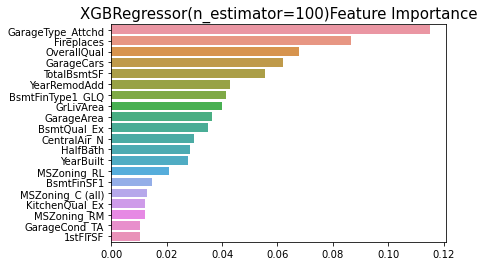

In [19]:
# Feature Importance를 시각화해주는 함수
def visualize_feature_importance(model):
    feature_top20 = get_feature_importance(model)
    sns.barplot(x = feature_top20.values, y = feature_top20.index)
    plt.title(str(model) + 'Feature Importance', size = 15)

visualize_feature_importance(xgb)

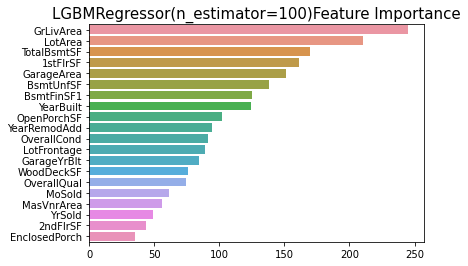

In [20]:
visualize_feature_importance(lgbm)

### Remove the Outlier

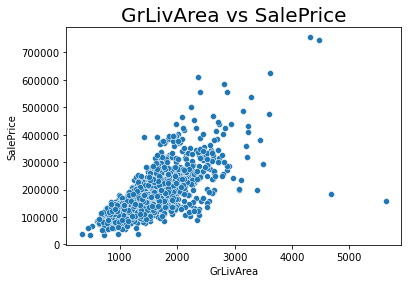

In [21]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train_org)
plt.title('GrLivArea vs SalePrice', size = 20)
plt.show()

오른쪽 하단에 GrLiveArea가 크지만 SalePrcie가 적은 두 개의 이상치가 존재한다.

In [22]:
outlier = train_org[(train_org['GrLivArea'] > 4000) & (train_org['SalePrice'] < 200000)]
print('Before delete: ', full_ohe.shape)
train.drop(outlier.index, axis = 0, inplace = True)
full_ohe.drop(outlier.index, axis = 0, inplace=  True)
print('After delete: ', full_ohe.shape)

Before delete:  (2919, 270)
After delete:  (2917, 270)


2개의 Outlier가 삭제되었다.

In [23]:
y_target = train['SalePrice']
X_features = full_ohe[:len(y_target)]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

xgb = XGBRegressor(n_estimator = 1000)
xgb.fit(X_train, y_train)

lgbm = LGBMRegressor(n_estimator = 1000)
lgbm.fit(X_train, y_train)

print('XGB RMSE: {}'.format(round(get_rmse(xgb),6)))
print('LGBM RMSE: {}'.format(round(get_rmse(lgbm),6)))

[23:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] Unknown parameter: n_estimator
XGB RMSE: 0.12104
LGBM RMSE: 0.128064


In [24]:
params = {'n_estimator' : [500], 
          'max_depth' : [3, 4, 5], 
          'learning_rate' : [0.05, 0.1, 0.3], 
          'subsample' : [0.6, 0.7, 0.75],
          'colsample_bytree' : [0.7, 0.75, 0.8, 1]}

grid_search = GridSearchCV(xgb, param_grid=params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = 1)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

[23:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:54:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:55:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:55:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:56:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:56:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [25]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
best_model.fit(X_train, y_train)
get_rmse(best_model)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimator': 500, 'subsample': 0.6}
[23:58:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.12089913964545713

GridSearch 이후, XGBoost 모델의 RMSE가 0.12104 -> 0.120899로 낮아졌다.

하이퍼 파라미터 튜닝 이후 모델의 성능이 근소하게 향상되었다.

In [27]:
predict = np.floor(np.expm1(best_model.predict(full_ohe[len(y_target):])))

In [28]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = predict
sub.to_csv('House Prcie_submission.csv', index = False)
sub

,Id,SalePrice
0,1461,124021.0
1,1462,159453.0
2,1463,185490.0
3,1464,185676.0
4,1465,195945.0
...,...,...
1454,2915,81451.0
1455,2916,86251.0
1456,2917,168971.0
1457,2918,120467.0


- 제출 결과 Top 33%가 나왔다.

심도 있는 EDA와 Feature Engineering을 한다면, 더 좋은 결과를 얻을 것 같다.

이번 Kernel에선 EDA와 Feature Engineering의 중요성에 대해 알아보고싶어 EDA와 Feature Engineering에 크게 심혈을 기울이지 않았다.

다음 Kernel에선 EDA, Feature Engineering을 더욱 신경 쓴 후, 결과 비교를 해볼 것이다.